# <span style='color:orange'> PROJET DATAGONG POUR LA FORMATION EN DATA-SCIENCES DES ETUDIANTS DE 10 000 CODEURS DEC 2024 </span>




## Il s'agit d'un projet de classification binaire qui a pour objectif de pr√©dire le parti politique victorieux des √©lections pr√©sidentielles de 2020 aux √âtats-Unis. Sur la base des donn√©es sociod√©mographiques, nous allons construire un mod√®le explicatif des r√©sultats des deux partis, √† savoir :

## * Le parti R√©publicain (1)
## * Le parti D√©mocrate (0)

### √Ä cet effet, nous disposons de plusieurs bases de donn√©es dont :
* la base du niveau d'√©ducation des adultes √¢g√©s de 25 ans et plus aux √âtats-Unis, dans les √âtats et les comt√©s, 1970-2019
* la base de la population estim√©e pour les √âtats-Unis, les √âtats et les comt√©s, 2010-19
* la base de l'estimation de la pauvret√© pour les √âtats-Unis, les √âtats et les comt√©s, 2019
* la base de ch√¥mage et le revenu m√©dian des m√©nages pour les √âtats-Unis, les √âtats et les comt√©s, 2000-19
* la base des r√©sultats des √©lections pr√©sidentielles 2020 des USA 

Nous avons √©galement un archive des √©lections de 2008 √† 2016 qui nous servira dans notre analyse exploratoire ! 

Sans tarder, commen√ßons par importer quelques biblioth√®ques : 

In [2]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import MissingIndicator, KNNImputer, SimpleImputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns
from scipy.stats import chi2_contingency, pearsonr, f_oneway

print("Toutes les biblioth√®ques ont √©t√© import√©es avec succ√®s")


Toutes les biblioth√®ques ont √©t√© import√©es avec succ√®s


## <span style='color:green'> **Etape 1: Constituer la base de donn√©es : importation, nettoyage et construction de la base finale de travail**   </span>


1. Nous allons importer les donn√©es, les observer et les joindre pour obtenir un DataFrame exploitable. Ensuite, nous allons passer √† la suppression des doublons puis au traitement des valeurs manquantes et des valeurs aberrantes. 
2. Nous allons utiliser le fichier des r√©sultats de 2020 pour cr√©er le target : (1) pour le Parti R√©publicain, (0) Pour le Parti D√©mocrate. Pour cela, nous avons cr√©√© une variable binaire en tenant compte du vote des r√©publicains et des d√©mocrates. Si le nombre de votes des r√©publicains est sup√©rieur √† celui des d√©mocrates, on a un, sinon 0.

In [3]:
#Importation des bases de donn√©e 
data_education = pd.read_excel ("C:/Users/HP PROBOOK/Desktop/VF Projet Datagong/Education.xls", header=4) 
data_population = pd.read_excel ("C:/Users/HP PROBOOK/Desktop/VF Projet Datagong/PopulationEstimates.xls", sheet_name= "Population Estimates 2010-19", header=2)
data_pauvreteestim√© = pd.read_excel ("C:/Users/HP PROBOOK/Desktop/VF Projet Datagong/PovertyEstimates.xls", header=4, sheet_name= "Poverty Data 2019")
data_uneployment = pd.read_excel (r"C:/Users/HP PROBOOK/Desktop/VF Projet Datagong/Unemployment.xls", header= 4)
data_2020_us_country = pd.read_csv(r"C:/Users/HP PROBOOK/Desktop/VF Projet Datagong/2020_US_County_Level_Presidential_Results.csv", sep=',')
data_resutat_08_16 = pd.read_csv(r"C:/Users/HP PROBOOK/Desktop/VF Projet Datagong/US_County_Level_Presidential_Results_08-16.csv", sep=',')

# Les dimensions de chaque base
all_df_list  = (data_education, data_population, data_pauvreteestim√©, data_uneployment, data_2020_us_country,data_resutat_08_16)
for df_ in (all_df_list  ):
    print (df_.shape) 

(3283, 47)
(3273, 165)
(3193, 34)
(3275, 88)
(3152, 10)
(3112, 14)


* <span style='color:red'> La base education √† 47 variables et 3283 individus </span>
* <span style='color:red'> La base de la population estim√©e pour les USA √† 165 variables et 3273 individus </span>
* <span style='color:red'> La base de la pauvret√© estim√©e pour les USA √† 34 variables et 3193 individus </span>
* <span style='color:red'> la base de Ch√¥mage et revenu m√©dian des m√©nages pour les √âtats-Unis √† 88 variables et 3275 individus </span>
* <span style='color:red'> la base des r√©sultats des √©lections pr√©sidentielles 2020 des USA √† 10 variables et 3152 individus </span>

1. Nous allons proc√©der √† une fusion par √©tape des bases de donn√©es en utilisant des cl√©s communes pour garantir une int√©gration compl√®te des donn√©es. Pour cela nous allons uniformiser les noms des colonnes dans toutes les bases pour √©viter les erreurs de correspondance. Ensuite nous allons passer √† un traitement rapide de la base (supprimer les doublons et g√©rer les valeurs manquantes)

In [4]:
# Nous allons renommer des variables dans la base 
data_education = data_education.rename(columns= {'FIPS Code' : 'FIPStxt', 'Area name' : 'Area_Name'}) 

data_population = data_population.rename (columns={'FIPS Code' : 'FIPStxt', 'Rural-urban_Continuum Code_2003' : '2003 Rural-urban Continuum Code' , 
                                                   'Urban_Influence_Code_2003' : '2003 Urban Influence Code', 'Rural-urban_Continuum Code_2013' : '2013 Rural-urban Continuum Code', 
                                                   'Urban_Influence_Code_2013' :'2013 Urban Influence Code'}) 

data_pauvreteestim√© = data_pauvreteestim√©.rename (columns={'Stabr' : "State", 'Area_name' : 'Area_Name','Rural-urban_Continuum_Code_2003' : '2003 Rural-urban Continuum Code' , 'Urban_Influence_Code_2003' : '2003 Urban Influence Code',
                                                           'Rural-urban_Continuum_Code_2013' : '2013 Rural-urban Continuum Code', 'Urban_Influence_Code_2013' :'2013 Urban Influence Code'})


data_uneployment = data_uneployment.rename (columns={'fips_txt' : 'FIPStxt' , 'Stabr' : 'State', 'area_name' : 'Area_Name', 'Rural_urban_continuum_code_2013' : '2013 Rural-urban Continuum Code',
                                                     'Urban_influence_code_2013' : '2013 Urban Influence Code'})
data_2020_us_country = data_2020_us_country.rename (columns={'county_fips' : 'FIPStxt' , 'state_name' : 'State'})

# Ici nous allons faire une copie et renommer les bases avec un nom plus court
ed = data_education.copy() # copie de la base
po = data_population.copy()
pauv = data_pauvreteestim√©.copy()
unep = data_uneployment.copy()
county = data_2020_us_country.copy()
result_08_16 = data_resutat_08_16.copy() 

In [5]:
#jointure des bases
from functools import reduce
list_dfs = [ed, po, pauv]
df_edu_pop_pauv = reduce(lambda left, right: pd.merge(left, right, on=['FIPStxt', 'State', 'Area_Name', '2003 Rural-urban Continuum Code',
                             '2003 Urban Influence Code', '2013 Rural-urban Continuum Code', '2013 Urban Influence Code'], how='outer'), list_dfs)
df_edu_pop_pauv

df_edu_pop_pauv_unep_county = df_edu_pop_pauv.merge(unep, on= ['FIPStxt', 'State', 'Area_Name', '2013 Rural-urban Continuum Code', '2013 Urban Influence Code'], how= 'outer').merge(county, on= ['FIPStxt', 'State'], how= 'outer')
df_edu_pop_pauv_unep_county 

FIPStxt    State                       Area_Name  \
0           0       US                   United States   
1        1000       AL                         Alabama   
2        1001       AL                  Autauga County   
3        1001       AL              Autauga County, AL   
4        1001  Alabama                             NaN   
...       ...      ...                             ...   
9743    72151       PR           Yabucoa Municipio, PR   
9744    72151       PR  Yabucoa Municipio, Puerto Rico   
9745    72153       PR                 Yauco Municipio   
9746    72153       PR             Yauco Municipio, PR   
9747    72153       PR    Yauco Municipio, Puerto Rico   

      2003 Rural-urban Continuum Code  2003 Urban Influence Code  \
0                                 NaN                        NaN   
1                                 NaN                        NaN   
2                                 2.0                        2.0   
3                                 NaN                        NaN   
4                                 NaN                        NaN   
...                               ...                        ...   
9743                              NaN                        NaN   
9744                              1.0                        1.0   
9745                              3.0                        2.0   
9746                              NaN                        NaN   
9747                              3.0                        2.0   

      2013 Rural-urban Continuum Code  2013 Urban Influence Code  \
0                                 NaN                        NaN   
1                                 NaN                        NaN   
2                                 2.0                        2.0   
3                                 2.0                        2.0   
4                                 NaN                        NaN   
...                               ...                        ...   
9743                              1.0                        1.0   
9744                              1.0                        1.0   
9745                              2.0                        2.0   
9746                              2.0                        2.0   
9747                              2.0                        2.0   

      Less than a high school diploma, 1970  High school diploma only, 1970  \
0                                52373312.0                      34158051.0   
1                                 1062306.0                        468269.0   
2                                    6611.0                          3757.0   
3                                       NaN                             NaN   
4                                       NaN                             NaN   
...                                     ...                             ...   
9743                                    NaN                             NaN   
9744                                    NaN                             NaN   
9745                                    NaN                             NaN   
9746                                    NaN                             NaN   
9747                                    NaN                             NaN   

      Some college (1-3 years), 1970  ...  Median_Household_Income_2019  \
0                         11650730.0  ...                       65712.0   
1                           136287.0  ...                       51771.0   
2                              933.0  ...                           NaN   
3                                NaN  ...                       58233.0   
4                                NaN  ...                           NaN   
...                              ...  ...                           ...   
9743                             NaN  ...                           NaN   
9744                             NaN  ...                           NaN   
9745                             NaN  ...          

In [6]:
# v√©rification des doublons √† partir des identifiants 'FIPStxt' 
print(f"le nombre de doublons sur l'identifiant est:{df_edu_pop_pauv_unep_county['FIPStxt'].duplicated().sum()}")

# Trier pour mettre les lignes avec plus d'infos en premier
df_tri_ligne = df_edu_pop_pauv_unep_county.sort_values(by= 'FIPStxt')

# Grouper et combiner les valeurs en fusionnant les lignes
df_edu_pop_pauv_unep_county= df_tri_ligne.groupby('FIPStxt').apply(lambda x: x.ffill().bfill().iloc[0]).reset_index(drop=True)
df_edu_pop_pauv_unep_county


# D√©finir le seuil (80% de valeurs manquantes -> conserver au moins 20% de valeurs valides)
seuil_lignes = 0.2 * len(df_edu_pop_pauv_unep_county.columns)  # 20% du nombre de colonnes
seuil_colonnes = 0.2 * len(df_edu_pop_pauv_unep_county)        # 20% du nombre de lignes

# Supprimer les lignes ayant 80% de valeurs manquantes
df_cleaned_ligne80 = df_edu_pop_pauv_unep_county.dropna(thresh=seuil_lignes)

# Supprimer les colonnes ayant 80% de valeurs manquantes
df_cleaned_col80 = df_cleaned_ligne80.dropna(thresh=seuil_colonnes, axis=1)

# On constate qu'il y a des individus qui n'ont pas du tout vot√©. Nous allons les supprimer en se basant sur la variable 'votes_gop'

print(f"le nombre de state sans vote est : {df_cleaned_col80['votes_gop'].isnull().sum()}")

#suppression des lignes qui n'ont pas d'information sur les votes
df_cleaned_col80 = df_cleaned_col80.dropna(subset = ['per_gop'])

#Cr√©ation du target ou notre variable endog√®ne
df_cleaned_col80['target_2020'] = (df_cleaned_col80['votes_gop'] > df_cleaned_col80['votes_dem']).astype(float)

# Suppression de certaines colonnes
data = df_cleaned_col80.drop(columns= ['votes_gop', 'votes_dem', 'total_votes', 'diff', 'per_gop', 'per_dem', 'per_point_diff'])

print(f"le base obtenue est : {data.shape}")

data 

le nombre de doublons sur l'identifiant est:6425


C:\Users\HP PROBOOK\AppData\Local\Temp\ipykernel_26572\2171849717.py:8: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_edu_pop_pauv_unep_county= df_tri_ligne.groupby('FIPStxt').apply(lambda x: x.ffill().bfill().iloc[0]).reset_index(drop=True)
C:\Users\HP PROBOOK\AppData\Local\Temp\ipykernel_26572\2171849717.py:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_edu_pop_pauv_unep_county= df_tri_ligne.groupby('FIPStxt').apply(lambda x: x.ffill().bfill().iloc[0]).reset_index(drop=T

le nombre de state sans vote est : 163
le base obtenue est : (3112, 311)


FIPStxt    State          Area_Name  2003 Rural-urban Continuum Code  \
2        1001       AL     Autauga County                              2.0   
3        1003       AL     Baldwin County                              4.0   
4        1005  Alabama     Barbour County                              6.0   
5        1007       AL        Bibb County                              1.0   
6        1009  Alabama      Blount County                              1.0   
...       ...      ...                ...                              ...   
3239    56037  Wyoming  Sweetwater County                              5.0   
3240    56039       WY       Teton County                              7.0   
3241    56041       WY       Uinta County                              7.0   
3242    56043       WY    Washakie County                              7.0   
3243    56045       WY      Weston County                              7.0   

      2003 Urban Influence Code  2013 Rural-urban Continuum Code  \
2                           2.0                              2.0   
3                           5.0                              3.0   
4                           6.0                              6.0   
5                           1.0                              1.0   
6                           1.0                              1.0   
...                         ...                              ...   
3239                        8.0                              5.0   
3240                        8.0                              7.0   
3241                        8.0                              7.0   
3242                       11.0                              7.0   
3243                        9.0                              7.0   

      2013 Urban Influence Code  Less than a high school diploma, 1970  \
2                           2.0                                 6611.0   
3                           2.0                                18726.0   
4                           6.0                                 8120.0   
5                           1.0                                 5272.0   
6                           1.0                                10677.0   
...                         ...                                    ...   
3239                        8.0                                 4393.0   
3240                        8.0                                  708.0   
3241                        8.0                                 1569.0   
3242                       11.0                                 1572.0   
3243                        9.0                                 1428.0   

      High school diploma only, 1970  Some college (1-3 years), 1970  ...  \
2                             3757.0                           933.0  ...   
3                             8426.0                          2334.0  ...   
4                             2242.0                           581.0  ...   
5                             1402.0                           238.0  ...   
6                             3440.0                           626.0  ...   
...                              ...                             ...  ...   
3239                          3731.0                           986.0  ...   
3240                           908.0                           524.0  ...   
3241                          1517.0                           445.0  ...   
3242                          1437.0                           590.0  ...   
3243                          1247.0                           398.0  ...   

      Unemployed_2018  Unemployment_rate_2018  Civilian_labor_force_2019  \
2               935.0                     3.6                    26172.0   
3              3424.0                     3.6                    97328.0   
4               427.0                     5.1                     8537.0   
5               337.0                     3.9                     8685.0   
6               868.0                     3.5             

<Axes: >

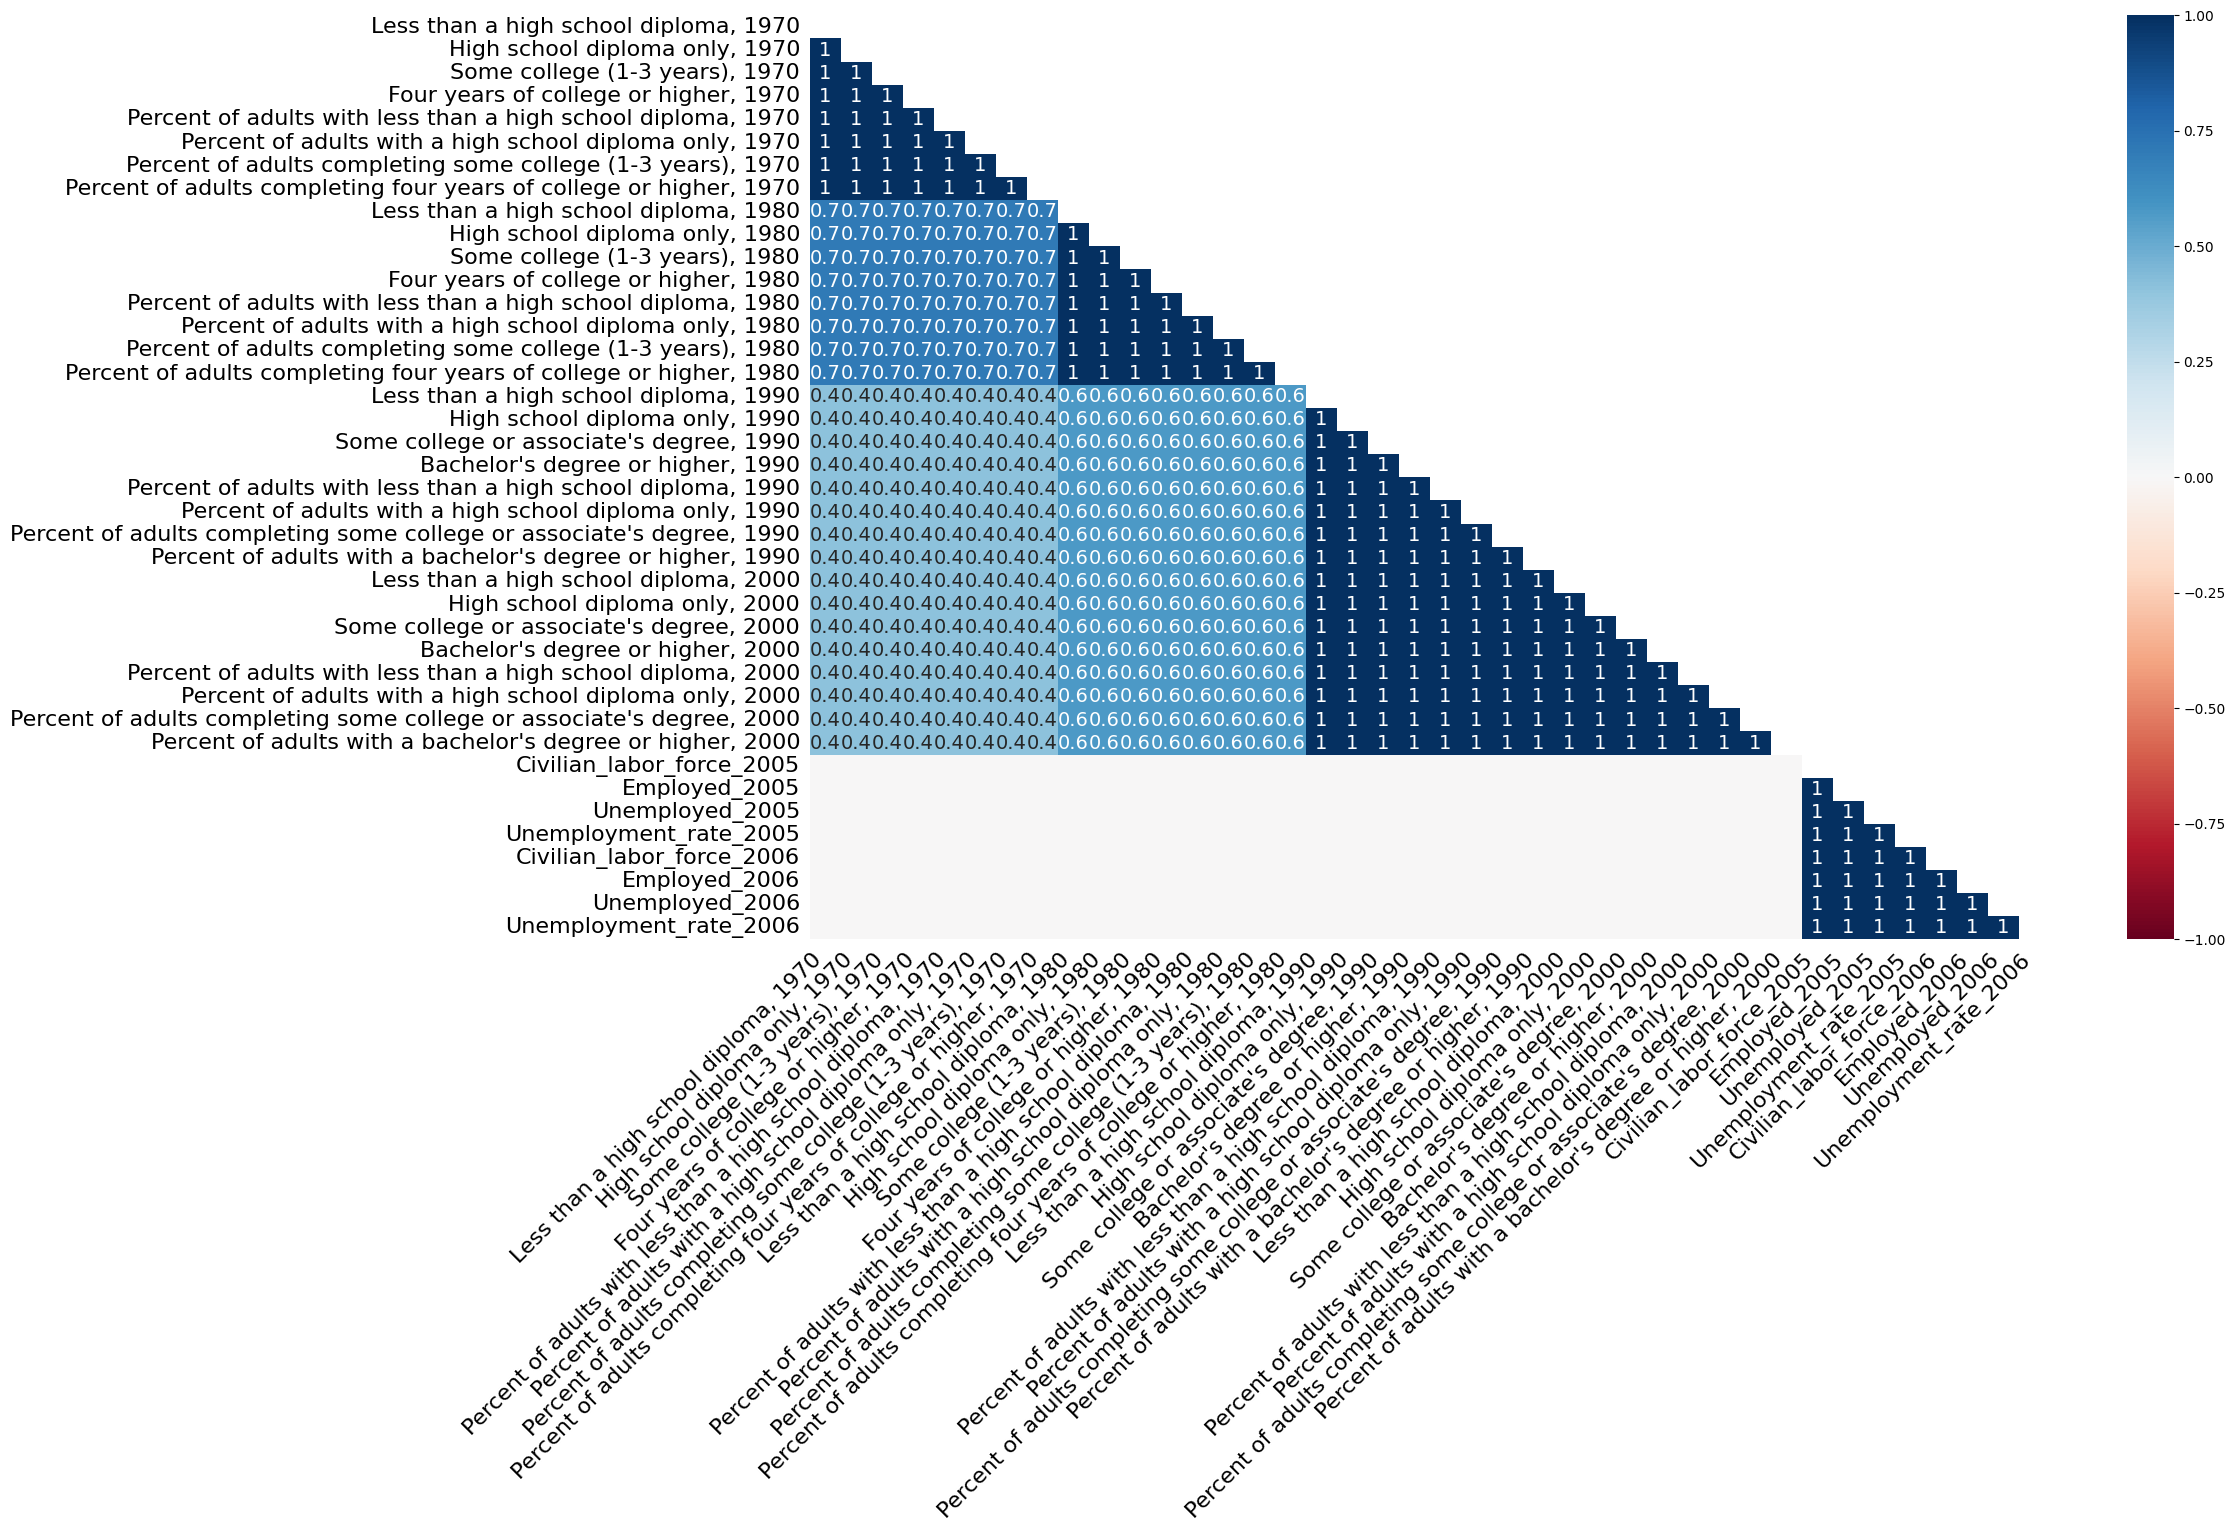

In [7]:
# V√©rification des valeurs manquantes
missing_values = data.isnull().sum()
missing_percent = (missing_values/ len(data)) * 100
# cr√©er la table des valeurs manquantes
table_missing_values = pd.DataFrame({'coluns' : data.columns, 'missing_values' : missing_values, 'missing_percent' :missing_percent}) 

msno.heatmap(data)

On peut constater qu'il y a une tr√®s forte corr√©lation entre les valeurs manquantes donc la m√©thode adapt√©e pour traiter ses valeurs manquantes est la m√©thode KNN. Nous allons l'appliquer pour nos variables quantitatives. 

In [8]:
# s√©paration des variables quantitatives
vari_quant = pd.DataFrame(data.select_dtypes(include=['number']))

# Normalisation des variables quantitatives
imputer = KNNImputer(n_neighbors= 5)

#Appliquer le mod√®le KNN
df_imputed = imputer.fit_transform(vari_quant)
numeric_data_imputed = pd.DataFrame(df_imputed, columns = vari_quant.columns) 

Passons au traitement des valeurs ab√©rrantes. Ici, nous utiliserons la m√©thode IQR 

In [9]:
# D√©tection et traitement des valeurs ab√©rrantes
numeric_data_imputed = numeric_data_imputed.drop(columns='target_2020')

def detect_and_replace_outliers_iqr(numeric_data_imputed):
    if not isinstance(numeric_data_imputed, pd.DataFrame):
        raise ValueError("L'entr√©e doit √™tre un DataFrame Pandas.")
    
    # Fonction pour d√©tecter les valeurs aberrantes
    def outlier_mask(col):
        Q1 = col.quantile(0.25)
        Q3 = col.quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        return (col < lower_bound) | (col > upper_bound)

    # D√©tection des valeurs aberrantes
    outliers = numeric_data_imputed.apply(outlier_mask)

    # Remplacement des valeurs aberrantes par la moyenne de la colonne
    for col in numeric_data_imputed.columns:
        mean_value = numeric_data_imputed[col].mean()  # Calcul de la moyenne
        numeric_data_imputed.loc[outliers[col], col] = mean_value  # Remplacement
    
    print(outliers.sum(), "\nTotal:", outliers.sum().sum(), "valeurs aberrantes remplac√©es par la moyenne.")

    return numeric_data_imputed


# Exemple d'utilisation
numeric_data_cleaned = detect_and_replace_outliers_iqr(numeric_data_imputed)

# S√©paration des variables qualitatives 
vari_quali = data[['State', 'Area_Name', 'county_name', 'FIPStxt', 'target_2020']]

# Reconstitition de la base 
data_cleaned = pd.merge(vari_quali, numeric_data_cleaned , on= ['FIPStxt'], how= 'outer')
data_cleaned

print(f"Le nombre de valeur manquante est : {data_cleaned.isnull().sum().sum()} et la dimension de la base otenue est : {data_cleaned.shape}")


FIPStxt                                        0
2003 Rural-urban Continuum Code                0
2003 Urban Influence Code                      0
2013 Rural-urban Continuum Code                0
2013 Urban Influence Code                      0
                                            ... 
Employed_2019                                446
Unemployed_2019                              423
Unemployment_rate_2019                        94
Median_Household_Income_2019                 143
Med_HH_Income_Percent_of_State_Total_2019    101
Length: 307, dtype: int64 
Total: 97634 valeurs aberrantes remplac√©es par la moyenne.
Le nombre de valeur manquante est : 0 et la dimension de la base otenue est : (3112, 311)


## <span style='color:green'> **Etape 2: L‚Äôanalyse exploratoire** </span> 

In [10]:
# s√©parer les variables qualitative et quantitatives
variable_quant = data_cleaned.select_dtypes(include=['number']) 
variable_quali = data_cleaned.select_dtypes(exclude=['number']) 

##### * <span style='color: pink'> **Analyse univari√©e**  </span> 

V√©rifions les statistiques g√©n√©rales de notre base : 

In [11]:
# les statistique g√©n√©rale des variables quantitatives de la base
Table_analyse_uni_quant = (data_cleaned.drop(columns=['FIPStxt', '2003 Rural-urban Continuum Code', '2003 Urban Influence Code', '2013 Rural-urban Continuum Code', '2013 Urban Influence Code'])).describe()
Table_analyse_uni_quant 

target_2020  Less than a high school diploma, 1970  \
count  3112.000000                            3112.000000   
mean      0.827121                            7867.810847   
std       0.378204                            5986.903558   
min       0.000000                              33.000000   
25%       1.000000                            3040.750000   
50%       1.000000                            5956.500000   
75%       1.000000                           11981.500000   
max       1.000000                           25312.000000   

       High school diploma only, 1970  Some college (1-3 years), 1970  \
count                     3112.000000                     3112.000000   
mean                      4349.146998                     1357.568450   
std                       3878.747181                     1279.836359   
min                          8.000000                        0.000000   
25%                       1265.750000                      376.000000   
50%                       2757.000000                      801.000000   
75%                       6794.000000                     2024.000000   
max                      15047.000000                     4492.000000   

       Four years of college or higher, 1970  \
count                            3112.000000   
mean                             1204.921569   
std                              1270.066051   
min                                 0.000000   
25%                               277.750000   
50%                               598.000000   
75%                              1713.000000   
max                              3826.000000   

       Percent of adults with less than a high school diploma, 1970  \
count                                        3112.000000              
mean                                           55.373380              
std                                            12.712787              
min                                            15.900000              
25%                                            45.700000              
50%                                            54.000000              
75%                                            65.900000              
max                                            88.400000              

       Percent of adults with a high school diploma only, 1970  \
count                                        3112.000000         
mean                                           28.406459         
std                                             8.124276         
min                                             5.800000         
25%                                            21.900000         
50%                                            29.400000         
75%                                            35.000000         
max                                            47.900000         

       Percent of adults completing some college (1-3 years), 1970  \
count                                        3112.000000             
mean                                            8.805809             
std                                             3.411844             
min                                             0.000000             
25%                                             6.100000             
50%                                             8.600000             
75%                                            11.100000             
max                                            18.800000             

       Percent of adults completing four years of college or higher, 1970  \
count                                        3112.000000                    
mean                                            6.690167                    
std                                             2.537342                    
min                                             0.000000                    
25%                                             4.800000                    
50%                                   

On constate que 
- La moyenne de personnes ayant moins d'un dipl√¥me d'√©tudes secondaires (Less than a high school diploma) a diminu√© entre 1970 (7867.81084664389) et 2019 (3556.356086770838). Il y a aussi une am√©lioration chez les personnes ayant suivi au moins quelques ann√©es d‚Äôuniversit√©. Globalement, on peut dire qu'il y a une am√©lioration du niveau d'√©ducation avec le temps.

- Le taux de ch√¥mage de 2003 (Unemployment_rate_2003) √† 2019 a √©volu√©, avec des fluctuations selon les p√©riodes mais de facon g√©nerale, il y a une am√©lioration du march√© du travail,

- Entre les ann√©es 2010 et 2019 il y a eu une croissance de la moyenne de l'estimation de la population r√©sidente de  41564.86052993305 √† 42647.922182810056. 


Tra√ßons le diagramme en barre pour visualiser les r√©sultats de chaque parti : 

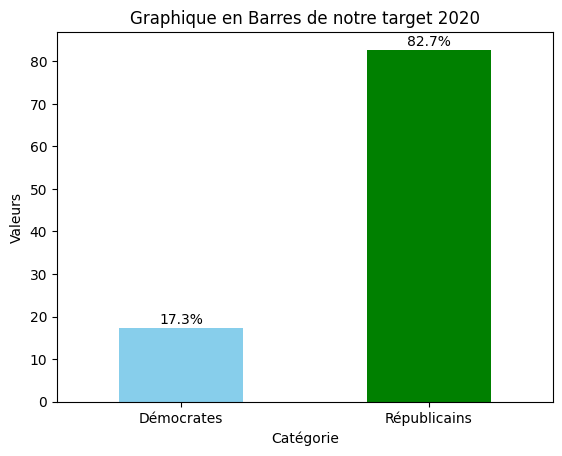

<Axes: xlabel='State'>

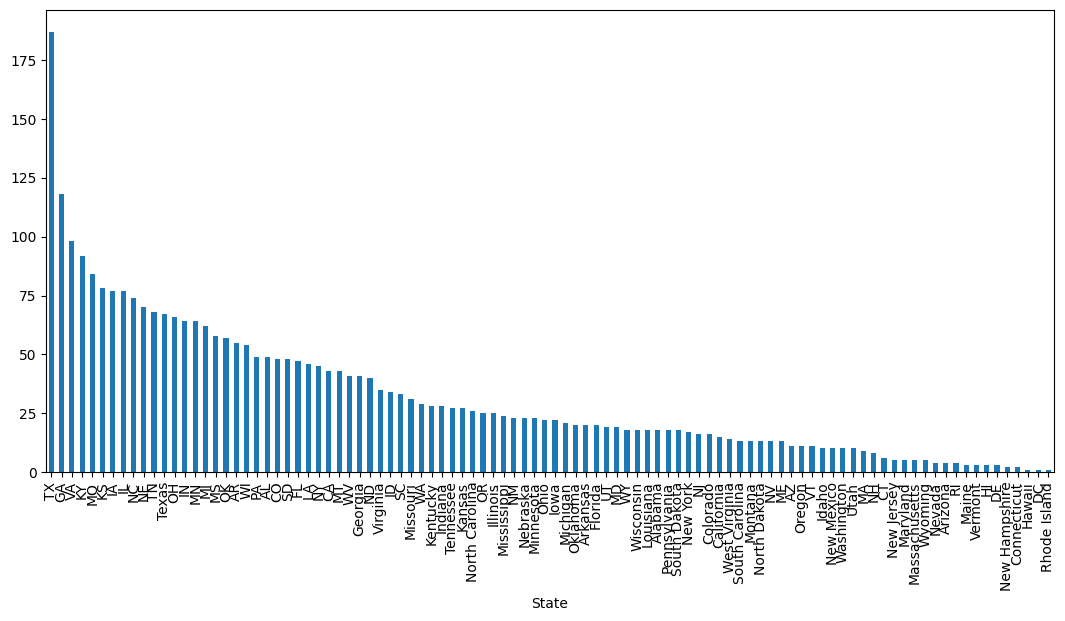

In [12]:
count_target = data_cleaned['target_2020'].value_counts() 
target_pourc = (count_target / count_target.sum()) * 100
table_target = pd.DataFrame ({'pourcentage taget' : target_pourc})

# Tracer le graphique en barres
ax = target_pourc.sort_index().plot(kind='bar', color=['skyblue', 'green'], legend=False)

# Ajouter des annotations (pourcentages)
for i, percentage in enumerate(target_pourc.sort_index()):
    plt.text(i, percentage + 1, f"{percentage:.1f}%", ha='center')

# Personnalisation
plt.xlabel('Cat√©gorie')
plt.ylabel('Valeurs')
plt.xticks([0, 1], ['D√©mocrates', 'R√©publicains'], rotation=0)
plt.title('Graphique en Barres de notre target 2020')
plt.show()


data_cleaned['State'].value_counts().plot.bar(figsize=(13, 6))

- les Republicains ont remport√© les √©lections a un pourcentage de 82,7, ce qui tr√®s √©l√©v√©. 
- Le Texas(TX) est la modalit√© ayant plus de fr√©quence  


Visualisons √©galement les r√©sultats des ann√©es pr√©c√©dentes :

Distribution de target_2008 :
target_2008
1    2237
0     875
Name: count, dtype: int64

Distribution de target_2012 :
target_2012
1    2426
0     686
Name: count, dtype: int64

Distribution de target_2016 :
target_2016
1    2625
0     487
Name: count, dtype: int64



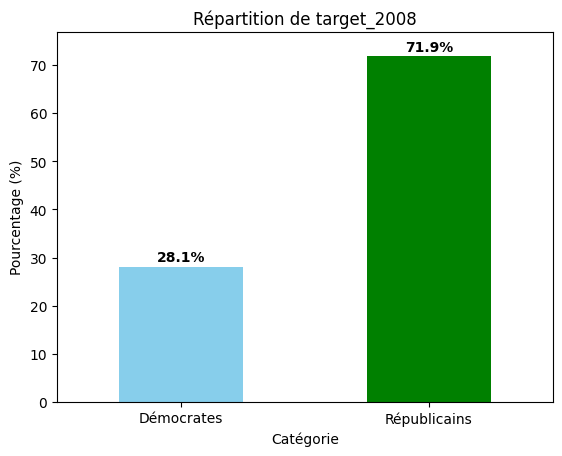

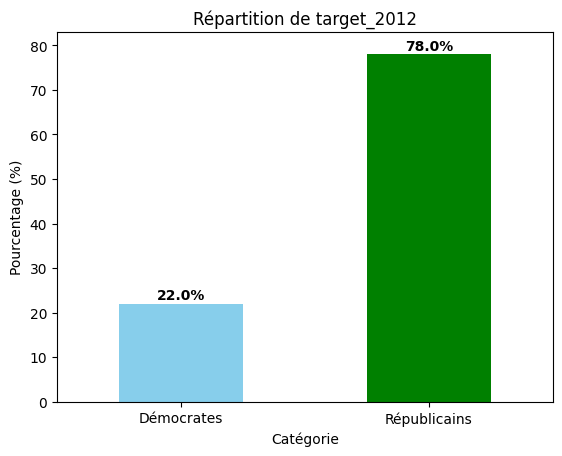

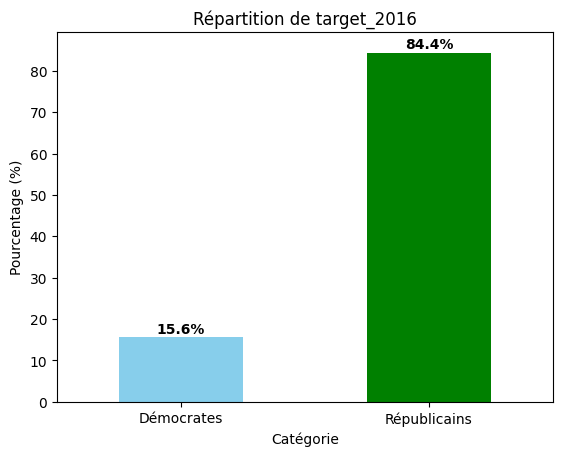

In [13]:
#Cr√©ation des target des ann√©es ant√©rieurs 
data_resutat_08_16['target_2008'] = (data_resutat_08_16['gop_2008'] > data_resutat_08_16['dem_2008']).astype(int)
data_resutat_08_16['target_2012'] = (data_resutat_08_16['gop_2012'] > data_resutat_08_16['dem_2012']).astype(int)
data_resutat_08_16['target_2016'] = (data_resutat_08_16['gop_2016'] > data_resutat_08_16['dem_2016']).astype(int)


# Appliquer value_counts() sur plusieurs colonnes
for col in ['target_2008', 'target_2012', 'target_2016']:
    print(f"Distribution de {col} :\n{data_resutat_08_16[col].value_counts()}\n")

    

data_target_08_16 = data_resutat_08_16[['target_2008', 'target_2012', 'target_2016']]

# Boucle pour g√©n√©rer les graphiques pour chaque variable
for var in data_target_08_16:
    count_var = data_resutat_08_16[var].value_counts()
    pourc_var = (count_var / count_var.sum()) * 100

    # Tracer le graphique en barres
    ax = pourc_var.sort_index().plot(kind='bar', color=['skyblue', 'green'], legend=False)

    # Ajouter des annotations (pourcentages)
    for i, percentage in enumerate(pourc_var.sort_index()):
        ax.text(i, percentage + 1, f"{percentage:.1f}%", ha='center', fontsize=10, fontweight='bold')

            # Personnalisation
    plt.xlabel('Cat√©gorie')
    plt.ylabel('Pourcentage (%)')
    plt.xticks([0, 1], ['D√©mocrates', 'R√©publicains'], rotation=0)
    plt.title(f'R√©partition de {var}')
    plt.ylim(0, pourc_var.max() + 5)  # Ajuste l'axe Y pour la lisibilit√© des annotations

    # Affichage du graphique
    plt.show()
   

##### * <span style='color: pink'> **Analyses bivari√©es**  </span>

Nous allons faire quelques analyses bivari√©es

Utilisation de la base des √©lections 2008 √† 2016 pour comparaison  les resultats de 2020

In [14]:
data_target_08_20 =pd.concat([data_target_08_16, data_cleaned['target_2020']], axis=1) 
data_target_08_20 

target_2008  target_2012  target_2016  target_2020
0               0            1            1          1.0
1               1            1            1          1.0
2               1            1            1          1.0
3               0            0            0          1.0
4               1            1            1          1.0
...           ...          ...          ...          ...
3107            0            1            1          1.0
3108            1            1            1          0.0
3109            1            1            1          1.0
3110            1            1            1          1.0
3111            1            1            1          1.0

[3112 rows x 4 columns]

In [15]:
# Cr√©er une table de comparaison pour les diff√©rentes ann√©es
comparaison = pd.DataFrame({
    'target_2008': data_target_08_20['target_2008'].value_counts(normalize=True) * 100,
    'target_2012': data_target_08_20['target_2012'].value_counts(normalize=True) * 100,
    'target_2016': data_target_08_20['target_2016'].value_counts(normalize=True) * 100,
    'target_2020': data_target_08_20['target_2020'].value_counts(normalize=True) * 100
}).fillna(0)  # Remplir les valeurs manquantes avec 0 si n√©cessaire

# Afficher la comparaison sous forme de tableau
print(comparaison)


   target_2008  target_2012  target_2016  target_2020
1    71.883033    77.956298      84.3509    82.712082
0    28.116967    22.043702      15.6491    17.287918


D'apr√®s nos donn√©es, les republicains ont gagn√© les √©lections avec un poucentage √©lev√© de 2008 √† 2020 ! 

In [16]:
# 1. Analyse bivari√©e : Qualitative vs Qualitative
chi2_quali = data_cleaned[['target_2020','State', 'Area_Name', 'county_name']]


# V√©rifier la corr√©lation entre les variables qualitatives et le target
def chi2_test(df, target):
    results = {}
    for col in df.columns:
        if col != target:
            # Construction du tableau de contingence
            contingency_table = pd.crosstab(df[col], df[target])
            
            # Test du Chi-2
            chi2, p, dof, expected = chi2_contingency(contingency_table)
            
            # Stocker la p-valeur
            results[col] = {'Chi2': chi2, 'p-value': p}

    return pd.DataFrame.from_dict(results, orient='index').sort_values(by='p-value')

# Appliquer le test de Chi-2
chi2_results = chi2_test( chi2_quali, 'target_2020')
print("\nR√©sultats du test de Chi-2 :\n", chi2_results)



R√©sultats du test de Chi-2 :
                     Chi2       p-value
State         686.254217  1.691311e-89
county_name  2132.967903  3.256904e-06
Area_Name    2535.946537  1.131077e-02


- Les trois variables (State, county_name, Area_Name) montrent toutes une corr√©lation statistiquement significative avec la variable cible (selon la p-value < 0.05).
Cependant, la corr√©lation est particuli√®rement forte pour "State", suivie de "county_name", et enfin "Area_Name", bien que cette derni√®re reste significative.


## <span style='color:green'> Etape 3: La mod√©lisation   </span> 

In [17]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import shap 

S√©paration du target des autres variables de la table : 

In [18]:
# S√©paration des donn√©es en variables explicatives (X) et variable qualitative (Y)
X = data_cleaned.drop(columns=['target_2020'])
y = data_cleaned['target_2020'] 

In [19]:
# S√©parer les colonnes num√©riques et cat√©gorielles des variables explicatives
num_features = X.select_dtypes(include=["int64", "float64"]).columns
cat_features = X.select_dtypes(include=["object"]).columns

# Encodage et mise √† l'√©chelle via un Pipeline des variables qualitatives 
preprocessor = ColumnTransformer([
    ("num", StandardScaler(), num_features),# Standardisation des variables num√©riques 
    ("cat", OneHotEncoder(handle_unknown="ignore", max_categories=10), cat_features)# Encodage des variables cat√©gorielles
])


# üìå D√©finition des mod√®les avec une pipeline int√©gr√©e
models = {
    # üîπ R√©gression Logistique (mod√®le baseline)
    "Logistic Regression": Pipeline([
        ("preprocessor", preprocessor),  # Applique le pr√©traitement
        ("classifier", LogisticRegression(max_iter=500))  # Mod√®le de r√©gression logistique avec plus d'it√©rations
    ]),

    # üîπ Arbre de D√©cision
    "Decision Tree": Pipeline([
        ("preprocessor", preprocessor),  # Applique le pr√©traitement
        ("classifier", DecisionTreeClassifier())  # Mod√®le d'arbre de d√©cision
    ]),

    # üîπ For√™t Al√©atoire (Random Forest)
    "Random Forest": Pipeline([
        ("preprocessor", preprocessor),  # Applique le pr√©traitement
        ("classifier", RandomForestClassifier(random_state=42))  # Mod√®le Random Forest avec un √©tat al√©atoire fix√©
    ]),

    # üîπ AdaBoost (Boosting adaptatif)
    "AdaBoost": Pipeline([
        ("preprocessor", preprocessor),  # Applique le pr√©traitement
        ("classifier", AdaBoostClassifier(random_state=42))  # Mod√®le AdaBoost avec un √©tat al√©atoire fix√©
    ])
}


D√©finition des hyperparam√®tres avec la recherche par grille et √©valuation de nos mod√®les : 

In [20]:
# üìå D√©finition des hyperparam√®tres √† tester avec GridSearchCV
param_grids = {
    "Logistic Regression": {"classifier__C": [0.1, 1, 10]},  # Force de r√©gularisation (plus C est grand, moins il y a de r√©gularisation)
    "Decision Tree": {"classifier__max_depth": [3, 5, 10]},  # Profondeur maximale de l'arbre (contr√¥le le surajustement)
    "Random Forest": {  
        "classifier__n_estimators": [50, 100, 200],  # Nombre d'arbres dans la for√™t
        "classifier__max_depth": [5, 10]  # Profondeur maximale des arbres
    },
    "AdaBoost": {
        "classifier__n_estimators": [50, 100, 200],  # Nombre de classificateurs faibles
        "classifier__learning_rate": [0.01, 0.1, 1]  # Taux d‚Äôapprentissage (impact sur le poids des erreurs)
    }
}

# üìå S√©paration des donn√©es en ensemble d'entra√Ænement et de test (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# üìå Dictionnaire pour stocker les meilleurs mod√®les apr√®s optimisation
best_models = {}

# üìå Entra√Ænement et optimisation de chaque mod√®le avec GridSearchCV
for name, pipeline in models.items():
    print(f"üîç Optimisation du mod√®le : {name}")
    
    # Cr√©ation de la recherche d'hyperparam√®tres avec validation crois√©e (5 folds)
    grid_search = GridSearchCV(
        pipeline,                 # Pipeline contenant pr√©traitement + mod√®le
        param_grids[name],        # Hyperparam√®tres √† tester
        cv=5,                     # Validation crois√©e en 5 folds
        scoring="accuracy",       # Score d'√©valuation bas√© sur l'accuracy
        n_jobs=-1,                # Utilisation de tous les c≈ìurs disponibles pour acc√©l√©rer l'ex√©cution
        verbose=1                 # Affichage du processus d'optimisation
    )

    # üìå Entra√Ænement du mod√®le avec les diff√©rentes combinaisons d'hyperparam√®tres
    grid_search.fit(X_train, y_train)

    # üìå Stocker le meilleur mod√®le trouv√©
    best_models[name] = grid_search.best_estimator_

    # üìå Afficher les meilleurs hyperparam√®tres s√©lectionn√©s
    print(f"‚úÖ Meilleurs hyperparam√®tres pour {name} : {grid_search.best_params_}") 


üîç Optimisation du mod√®le : Logistic Regression
Fitting 5 folds for each of 3 candidates, totalling 15 fits
‚úÖ Meilleurs hyperparam√®tres pour Logistic Regression : {'classifier__C': 0.1}
üîç Optimisation du mod√®le : Decision Tree
Fitting 5 folds for each of 3 candidates, totalling 15 fits
‚úÖ Meilleurs hyperparam√®tres pour Decision Tree : {'classifier__max_depth': 10}
üîç Optimisation du mod√®le : Random Forest
Fitting 5 folds for each of 6 candidates, totalling 30 fits
‚úÖ Meilleurs hyperparam√®tres pour Random Forest : {'classifier__max_depth': 10, 'classifier__n_estimators': 200}
üîç Optimisation du mod√®le : AdaBoost
Fitting 5 folds for each of 9 candidates, totalling 45 fits
‚úÖ Meilleurs hyperparam√®tres pour AdaBoost : {'classifier__learning_rate': 1, 'classifier__n_estimators': 200}


In [21]:
# S√©parer les colonnes num√©riques et cat√©gorielles des variables explicative
num_features = X.select_dtypes(include=["int64", "float64"]).columns
cat_features = X.select_dtypes(include=["object"]).columns

# Encodage et mise √† l'√©chelle via un Pipeline des variables qualitative
preprocessor = ColumnTransformer([
    ("num", StandardScaler(), num_features),# Standardisation des variables num√©riques 
    ("cat", OneHotEncoder(handle_unknown="ignore", max_categories=10), cat_features)# Encodage des variables cat√©gorielles
])


# üìå D√©finition des mod√®les avec une pipeline int√©gr√©e
models = {
    # üîπ R√©gression Logistique (mod√®le baseline)
    "Logistic Regression": Pipeline([
        ("preprocessor", preprocessor),  # Applique le pr√©traitement
        ("classifier", LogisticRegression(max_iter=500))  # Mod√®le de r√©gression logistique avec plus d'it√©rations
    ]),

    # üîπ Arbre de D√©cision
    "Decision Tree": Pipeline([
        ("preprocessor", preprocessor),  # Applique le pr√©traitement
        ("classifier", DecisionTreeClassifier())  # Mod√®le d'arbre de d√©cision
    ]),

    # üîπ For√™t Al√©atoire (Random Forest)
    "Random Forest": Pipeline([
        ("preprocessor", preprocessor),  # Applique le pr√©traitement
        ("classifier", RandomForestClassifier(random_state=42))  # Mod√®le Random Forest avec un √©tat al√©atoire fix√©
    ]),

    # üîπ AdaBoost (Boosting adaptatif)
    "AdaBoost": Pipeline([
        ("preprocessor", preprocessor),  # Applique le pr√©traitement
        ("classifier", AdaBoostClassifier(random_state=42))  # Mod√®le AdaBoost avec un √©tat al√©atoire fix√©
    ])
}



üìå Mod√®le : Logistic Regression
Accuracy : 0.8764 | F1-score : 0.9252


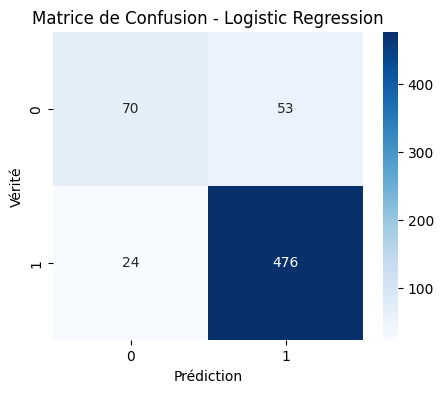


üìå Mod√®le : Decision Tree
Accuracy : 0.8700 | F1-score : 0.9204


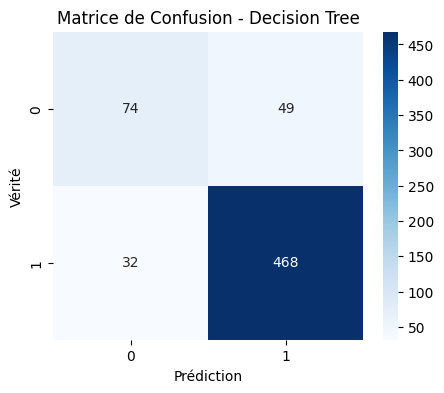


üìå Mod√®le : Random Forest
Accuracy : 0.8828 | F1-score : 0.9301


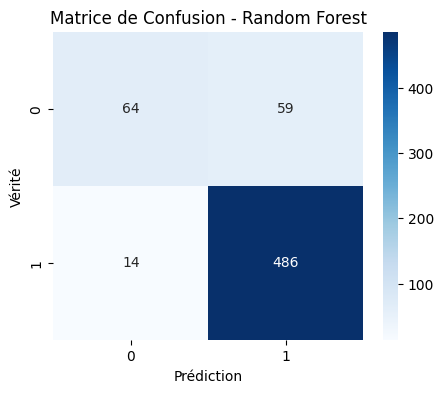


üìå Mod√®le : AdaBoost
Accuracy : 0.8748 | F1-score : 0.9243


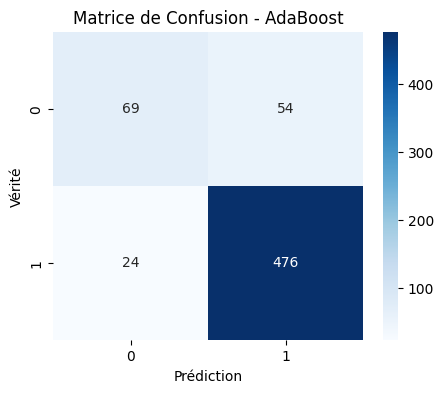

In [22]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# üìå Boucle sur chaque mod√®le optimis√©
for name, model in best_models.items():
    print(f"\nüìå Mod√®le : {name}")
    
    # üìå Pr√©diction sur le test set
    y_pred = model.predict(X_test)
    
    # üìå Calcul des m√©triques
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    print(f"Accuracy : {acc:.4f} | F1-score : {f1:.4f}")
    
    # üìå Matrice de confusion
    conf_matrix = confusion_matrix(y_test, y_pred)

    # üìä Affichage de la matrice de confusion avec Seaborn
    plt.figure(figsize=(5, 4))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.xlabel("Pr√©diction")
    plt.ylabel("V√©rit√©")
    plt.title(f"Matrice de Confusion - {name}")
    plt.show() 

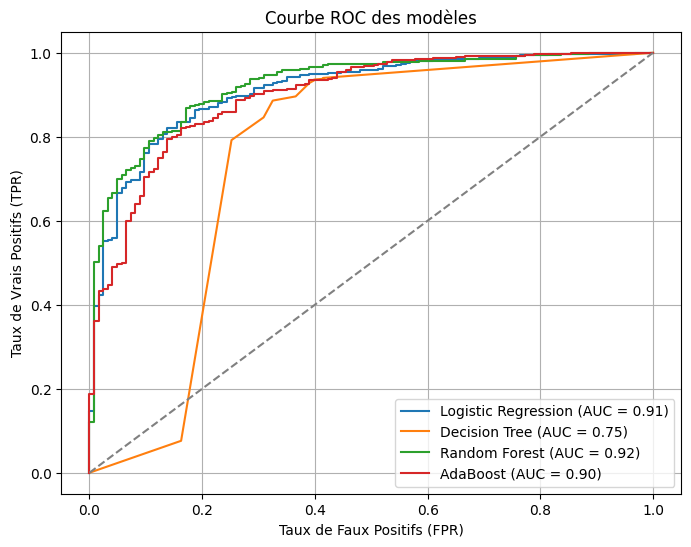

In [23]:
from sklearn.metrics import roc_curve, auc

# üìå Tracer la courbe ROC pour chaque mod√®le
plt.figure(figsize=(8, 6))

for name, model in best_models.items():
    # üîπ Pr√©dictions des probabilit√©s de la classe positive
    if hasattr(model, "predict_proba"):  # Certains mod√®les comme SVM peuvent ne pas avoir `predict_proba`
        y_score = model.predict_proba(X_test)[:, 1]  # Probabilit√© d'appartenir √† la classe positive
    else:
        y_score = model.decision_function(X_test)  # Pour certains mod√®les comme SVM

    # üîπ Calcul des courbes ROC
    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)  # Calcul de l'aire sous la courbe ROC (AUC)

    # üîπ Trac√© de la courbe ROC
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.2f})")

# üìå Ajout des labels et du style
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')  # Diagonale (mod√®le al√©atoire)
plt.xlabel("Taux de Faux Positifs (FPR)")
plt.ylabel("Taux de Vrais Positifs (TPR)")
plt.title("Courbe ROC des mod√®les")
plt.legend(loc="lower right")
plt.grid(True)
plt.show() 

Logistic Regression : 

Accuracy (87,64 %) : Pr√©diction correcte dans 87,64 % des cas. Le mod√®le est g√©n√©ralement fiable, mais quelques erreurs subsistent. 

F1-score (0.92) : Bon √©quilibre entre pr√©cision et rappel, indiquant une solide performance pour classer les √©lecteurs dans les bonnes cat√©gories. 

AUC (0.91) : Excellente capacit√© √† diff√©rencier les classes. 

Decision Tree :

Accuracy (87 %) : Moins pr√©cis que la r√©gression logistique. 

F1-score (0.91) : Reste √©lev√© malgr√© l'accuracy plus faible.
        
AUC (0.75) : Moins performant pour diff√©rencier les classes. 


Random Forest :

Accuracy (88,28 %) : Le plus pr√©cis des mod√®les.

F1-score (0.93) : Excellente gestion de la pr√©cision et du rappel.

AUC (0.92) : Tr√®s bonne capacit√© √† faire des distinctions claires entre les classes.

AdaBoost :

Accuracy (86,84 %) : Moins √©lev√© que Random Forest, mais toujours bon.

F1-score (0.9204) : Bon √©quilibre entre pr√©cision et rappel.

AUC (0.87) : Moins performant que les autres mod√®les.


Random Forest est le mod√®le le plus performant, avec la meilleure accuracy et AUC, ce qui en fait le meilleur choix pour pr√©dire les r√©sultats. Logistic Regression suit de pr√®s et peut √™tre une alternative simple mais efficace.

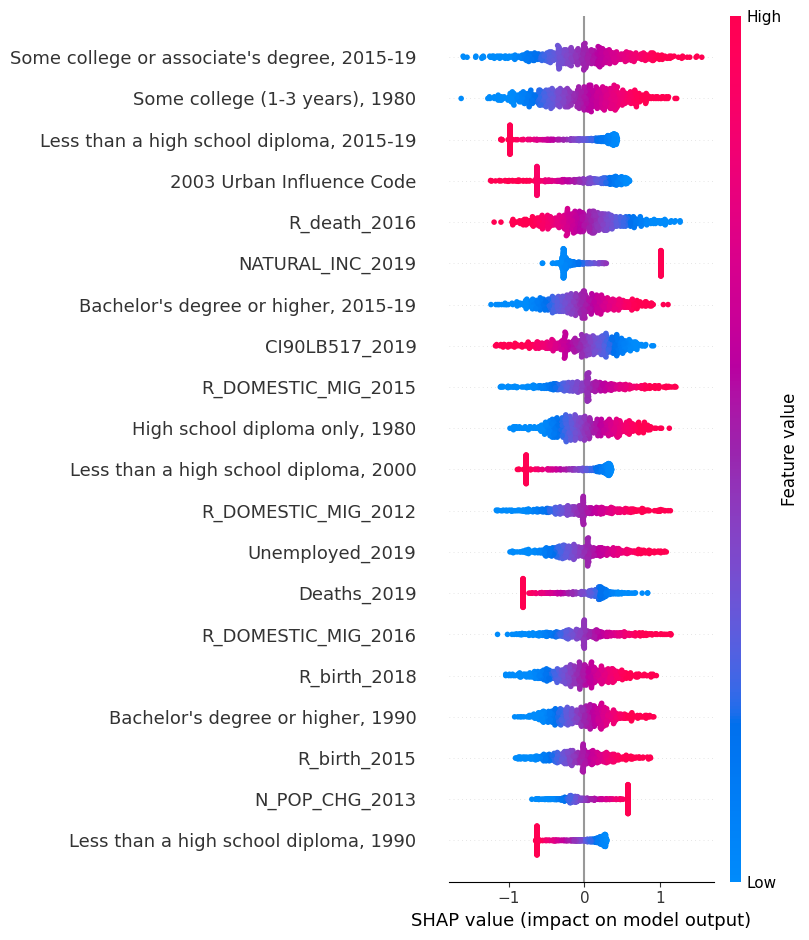

In [24]:
 
# üîπ Explainer SHAP pour Logistic Regression 
log_reg_model = best_models["Logistic Regression"]

# On extrait X_test √† partir du preprocessor pour garantir qu'il est bien encod√©
X_test_transformed = best_models["Logistic Regression"].named_steps['preprocessor'].transform(X_test)

# Utilisation de l'Explainer SHAP pour Logistic Regression
explainer_log_reg = shap.Explainer(log_reg_model.named_steps['classifier'], X_test_transformed)
shap_values_log_reg = explainer_log_reg(X_test_transformed)

# üîπ Visualiser l'importance des caract√©ristiques pour Logistic Regression
plt.figure(figsize=(12, 8))  # Agrandissement du graphique
shap.summary_plot(shap_values_log_reg, X_test_transformed, feature_names=X_test.columns)


Ce graphique indique que l‚Äô√©ducation et certaines tendances d√©mographiques ont une influence majeure sur la variable cible du mod√®le. En r√©sum√© :
* Un niveau d‚Äô√©ducation plus √©lev√© (college, bachelor‚Äôs degree) a un impact positif sur la pr√©diction.
* Un faible niveau d‚Äô√©ducation, un ch√¥mage √©lev√© et un nombre important de d√©c√®s influencent n√©gativement la pr√©diction.
* Certaines variables, comme l‚Äôurbanisation et les migrations, ont des effets plus complexes.


Fin 